# DCGAN
### This notebook contains an implementation of the model described [here](https://arxiv.org/abs/1511.06434)

## Dataset

### Loading

In [1]:
from scripts.data.load import load_dataset

dataset_name = "scapes"

dataset = load_dataset(dataset_name, normalize=True, batch=True, colab=False)

Found 11991 files belonging to 1 classes.


### Training image preview

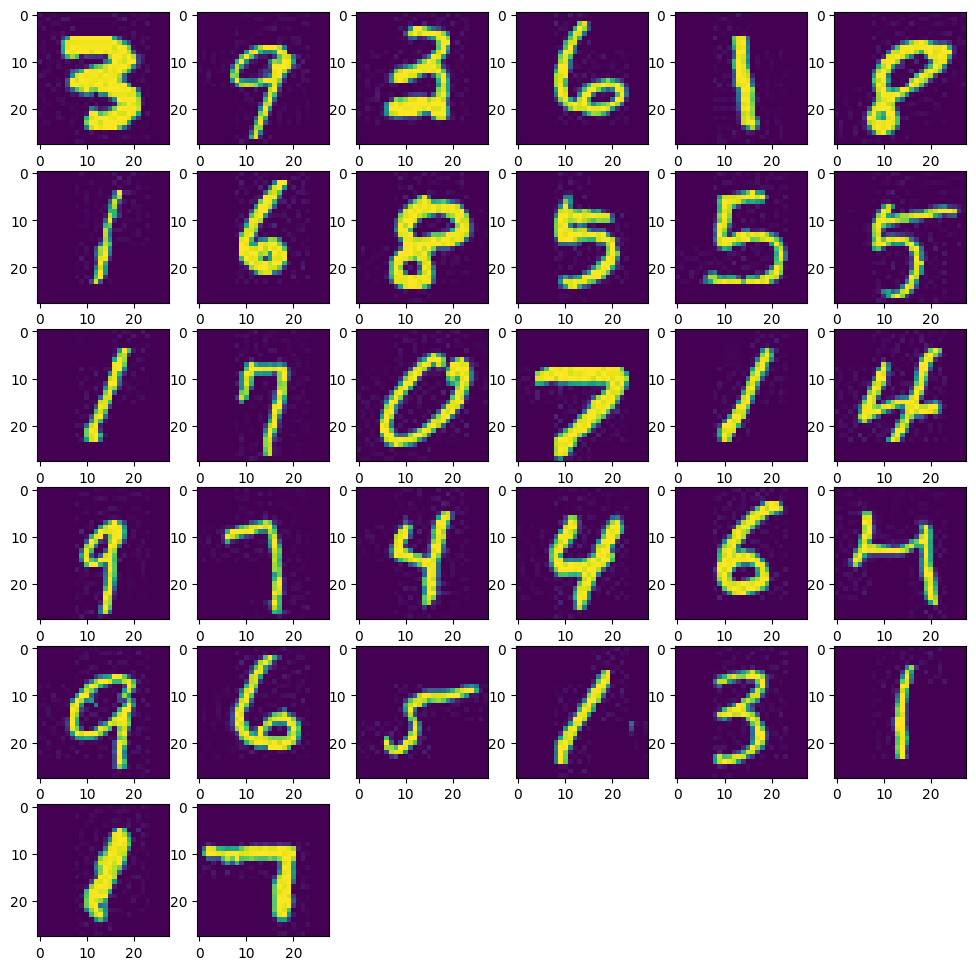

In [2]:
from scripts.data.visualization import display_images
import tensorflow as tf

# Take doesn't alter the dataset itself, so this won't affect the training
for batch in dataset.take(1):
    display_images(batch.numpy(), max_images=32)


## Load Config

In [2]:
from config import get_config

config = get_config(dataset_name)

## Build GAN

In [3]:
from scripts.model.build import build_model
model_name = "dcgan"
generator, discriminator = build_model(model_name, dataset_name)

/Users/chenstanilovsky/coding/capstone/art-generator/env/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


## Model summaries

In [2]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 921600)            93081600  
                                                                 
 reshape (Reshape)           (None, 90, 160, 64)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 180, 320, 32)     18464     
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 180, 320, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 360, 640, 32)     9248      
 ranspose)                                                       
                                                        

In [6]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 256)         0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12545     
                                                                 
Total params: 308,993
Trainable params: 308,993
Non-tr

## Test Generator output

0.000104032726 0.005349449 -0.0050187306


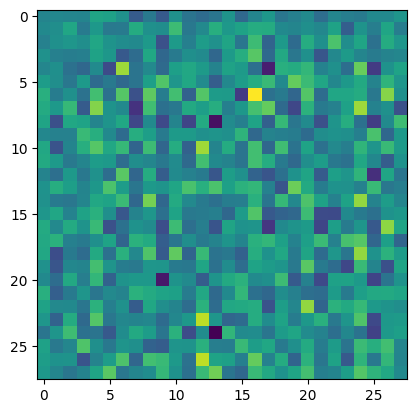

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

input_noise = tf.random.normal([1, 100])
generated_image = generator(input_noise, training=False)[0]
print(np.average(generated_image), np.max(generated_image), np.min(generated_image))
# generated_image[0]
plt.imshow(generated_image)

## Test Discriminator output

In [9]:
decision = discriminator(np.reshape(
                                        generated_image,                    
                                        (1, 
                                        config['dataset']['height'], 
                                        config['dataset']['width'], 
                                        config['dataset']['num_color_channels'])
                                    )
                        )
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.49999186]], dtype=float32)>

## Training the model

In [4]:
import time
from scripts.model.hyperparameters import get_dcgan_hyperparameters
from scripts.model.loss import generator_loss, discriminator_loss
from scripts.model.train import train

generator_optimizer = config['dataset'][model_name]['generator']['optimizer']
discriminator_optimizer = config['dataset'][model_name]['discriminator']['optimizer']

models = {
    'generator': {
        'model': generator,
        'loss': generator_loss,
        'optimizer': discriminator_optimizer
    },
    'discriminator': {
        'model': discriminator,
        'loss': discriminator_loss,
        'optimizer': discriminator_optimizer
    }
}

start = time.time()
train(models, dataset, epochs=1, len_seed=config['len_seed'], num_test_seeds=16)
end = time.time()
print(f'Total training time (in seconds): {end - start}')

KeyboardInterrupt: 

## Rescaling image output from [-1, 1] to [0, 255]

In [ ]:
rand_seed = tf.random.normal([1, 100])
image = generator(rand_seed, training=False)[0]
image = image.numpy()
image = ((image - np.min(image)) * 255) / (np.max(image) - np.min(image))
# image
# image = ((image * 127.5) + 127.5)
image = image.astype(np.uint8)
plt.imshow(image)

In [ ]:
image = (image + 1)/(2) * 255
np.min(image), np.max(image)
# # image = np.expand_dims(image, axis=0)
# # rand_seed
plt.imshow(image[:, :, 0], cmap='gray')

## Saving the model

In [ ]:
generator.save('./models/generator')

In [ ]:
discriminator.save('./models/discriminator')

## Download folder

In [ ]:
!tar cvf toy_model_batch_processing.tgz toy_model_batch_processing/

In [ ]:
!tar cvf generator.tgz ./models/generator